In [1]:
import os.path
import re
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common import exceptions
import json
from collections import OrderedDict
import sys
import bs4
import json
import re

In [288]:
import matplotlib.image as img
import matplotlib.pyplot as pp

In [314]:
%matplotlib inline

In [3]:
with open('Untitled', encoding = 'utf-8') as json_file:
    list_before = json.load(json_file)

list_movie = list_before['movieListResult']['movieList']
len_movie = len(list_movie)

In [332]:
class watcha_crawler(webdriver.Chrome):
    
    def log_in(self, id, password):
        self.get('https://watcha.com/ko-KR')
        now_html = self.page_source
        now_source = BeautifulSoup(now_html, 'lxml')

        #로그인 클릭 하는 코드
        self.find_elements_by_tag_name("li")[1].click()

        now_html = self.page_source
        now_source = BeautifulSoup(now_html, 'lxml')
        # 로그인 정보 넘겨주는 코드
        self.find_element_by_id("sign_in_email").send_keys(id)
        self.find_element_by_id("sign_in_password").send_keys(password)
        self.find_elements_by_tag_name("button")[6].click()
        
    
    def find_matching(self, list_movie, i): # 영화 리스트와 순서를 인풋으로 받으면
        
        count = 0
        name_movie_pre = list_movie[i]['movieNm'] # 영화 리스트에서 매칭 쿼리를 잡고
        name_movie = re.sub(' ','%20',name_movie_pre)
        year_movie = list_movie[i]['prdtYear'] 
        nation_movie = list_movie[i]['repNationNm'] 
        self.get('https://watcha.com/ko-KR/search?query='+name_movie) # 왓챠에서 영화를 검색해 본다.
        now_html = self.page_source
        now_source = BeautifulSoup(now_html, 'lxml')
        title_prev = now_source.find_all('li', {'class':"css-106b4k6-Self e3fgkal0" }) # 검색 결과 다양한 영화가 나오니 listup을 한다.
        len_same = len(title_prev)
        
        print(name_movie_pre + '에 대한 결과')
        print('정답은 {}, {}, {}'.format(name_movie_pre, year_movie, nation_movie))

        for j in range(len_same): #제목, 제작년도, 국가를 매칭시켜서 맞는 걸 찾는다.
            query_title = title_prev[j].a.find_all('div')[2].find_all('div')[0].text
            query_movie = title_prev[j].a.find_all('div')[2].find_all('div')[1].text.split()[0]
            query_nation = title_prev[j].a.find_all('div')[2].find_all('div')[1].text.split()[2]
            
            if(query_title == name_movie_pre and query_movie == year_movie and query_nation == nation_movie): # 세 조건이 맞으면
                print(name_movie_pre + '매칭 성공\n##########################################\n')
                movie_url = 'https://watcha.com' + title_prev[j].a['href'] # 매칭되는 영화 페이지를 리턴
                count+=1
                return movie_url
        
        if(count<1):
            if(len_same<1):
                print('검색 결과가 없음\n##########################################\n')
            else:
                print('검색 결과는 있지만 매칭되는 게 없음\n##########################################\n')
            movie_url = 0
            return movie_url

    def save_synopsis(self, movie_url):
        if(movie_url != 0): # 매칭되는 영화가 있었으면
            self.get(movie_url)
            now_html = self.page_source
            now_source = BeautifulSoup(now_html, 'lxml')
            synopsis_prev = now_source.find_all('div', {'class':"css-1jyvmaq-ViewMore et86el20"})[0]
            synopsis_prev2 = synopsis_prev.a['href']
            self.get('https://watcha.com' + synopsis_prev2)
            now_html = self.page_source
            now_source = BeautifulSoup(now_html, 'lxml')
            synopsis = now_source.find_all('dd', {'class':"css-77qx4t-SummaryDetail e1kvv3954"})[0].text
            print(synopsis)
    
    def save_comments(self, movie_url, num_comments):
        if(movie_url != 0): # 매칭되는 영화가 있었으면
            self.get(movie_url+'/comments')
            for i in range(num_comments//3): #로그인 해야함. num_comments만큼 댓글 수집. 한 번 스크롤에 3개씩 추가
                crawler.execute_script("window.scrollTo(0, document.body.scrollHeight);") #검증은 해봐야.
            
            screenshot_name = "check.png"
            self.save_screenshot(screenshot_name)
            ndarray = img.imread("check.png")
            pp.imshow(ndarray)
            pp.show()

    
    

In [344]:
wd = "./chromedriver"
crawler = watcha_crawler(wd)

In [345]:
crawler.log_in('kpdpkp@naver.com','meanimo123') # 댓글 더보기를 하려면 로그인 해야 함.

In [346]:
movie_url = crawler.find_matching(list_movie,8)

갈까부다에 대한 결과
정답은 갈까부다, 2018, 한국
갈까부다매칭 성공
##########################################



In [347]:
crawler.save_synopsis(movie_url)

43살 영화감독 고봉수는 자신보다 18살 어린 여자친구 최은비를 위해 국악 다큐멘터리를 기획한다. 지금까지 여자친구에게 제대로 된 선물을 한 적이 없던 고봉수는 여자친구가 크게 감동 할 것이라 생각해 야심차게 준비하지만 다큐멘터리 제작을 위해 여자친구의 친구들과 가족들을 인터뷰를 하는 과정에서 온갖 욕과 모욕적인 말을 듣게 되고 극심한 반대에 부딪힌다. 좌절한 고봉수는 최은비의 아버지를 자신의 편으로 만들면 모든 것이 해결될 것이라 생각해 최은비의 아버지를 찾아가지만 되려 최은비의 아버지는 고봉수를 구타하며 크게 분노한다. 자신과 여자친구의 가족들 뿐 아니라 주변 모든 지인들이 반대를 하는 연애. 결국 둘은 반대에 지쳐 헤어지게 된다. 고봉수는 마지막 선물로써 여자친구의 국악 다큐멘터리를 완성시킨다.


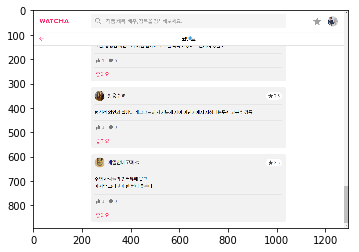

In [348]:
crawler.save_comments(movie_url,1000)

try:
    self.find_element_by_css_selector(".u_cbox_in_view_comment").click() #댓글 보기 누르는 코드
    time.sleep(speed)
except exceptions.ElementNotInteractableException as e:
    pass
except exceptions.NoSuchElementException as e:
    try:
        new_addr = dom.find_all('div', {'class' : 'simplecmt_links'})
        new_addr = new_addr[0].select('a')[0]['href']
        self.get(new_addr)
        time.sleep(speed)
    except:
        pass
    pass

class crawler(webdriver.Chrome):
    
    def get_input(self):
    
        press_dict = {'경향신문' : '032' , '국민일보' : '005', '동아일보' : '020', '문화일보' : '021', '서울신문' : '081', \
                      '세계일보' : '022', '조선일보' : '023', '중앙일보' : '025', '한겨레' : '028', '한국일보' : '469'}
        print('크롤링을 원하는 언론사를 입력.\n')
        print("ex) 경향신문, 국민일보, 동아일보, 문화일보, 서울신문, 세계일보, 조선일보, 중앙일보, 한겨레, 한국일보, \
이외의 언론사는 0 입력\n")
        input_press = input()

        if input_press in press_dict.keys():
            self.press = input_press
            get_number = press_dict[input_press]
            print('\n원하는 날짜를 입력(yyyymmdd)')
            input_date = input()
            puzzle_url = 'https://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&oid=' + get_number + '&date=' + input_date
            print('\n{}의 {}날짜 뉴스를 크롤링합니다.\n'.format(input_press, input_date))

        else:
            print('\n입력한 언론사가 리스트에 없습니다. https://news.naver.com/main/officeList.nhn 에 들어가서 원하는 언론사의 url을 \
입력해주세요.\n')
            puzzle_url = input()
            self.get(puzzle_url)
            input_now = self.page_source
            input_source = BeautifulSoup(input_now, 'lxml')
            page_list = input_source.find_all('div', {'class' : 'newsflash_header3'})
            press_now = page_list[0].h3.text
            self.press = press_now
            print('\n{} 맞나요? 원하는 날짜를 입력(yyyymmdd).\n'.format(press_now))
            test_date = input()
            print('\n{}의 {}날짜 뉴스를 크롤링합니다.\n'.format(press_now, test_date))
            puzzle_url = puzzle_url+ '&date=' + test_date

        return puzzle_url
    
    def move_page(self, page_num): # 어떤 날의 여러 페이지 중에 하나로 이동하고 url 을 얻는 method
        page_url = puzzle_url + '&page=' + str(page_num)
        self.get(page_url)
        return page_url
    
    def list_up(self, html):
        
        listup = BeautifulSoup(html, 'lxml')
        lists = listup.find_all('a', {'class' : 'nclicks(cnt_papaerart)'})
        lists += listup.find_all('a', {'class' : 'nclicks(cnt_papaerart3)'})
        lists += listup.find_all('a', {'class' : 'nclicks(cnt_papaerart4)'})
        lists += listup.find_all('a', {'class' : 'nclicks(cnt_flashart)'})
        
        news_list = [article for article in lists if type(article.find('img')) != bs4.element.Tag] # 이미지는 제외
        
        return news_list
    
    def break_check(self, news_list, list_tmp): #예시) 14페이지와 15페이지의 뉴스리스트가 같다면 break 
        
        if(list_tmp == news_list[0]): 
            return True
        else:
            return False
        
    def exclude_sports_ent(self):
        check = self.current_url
        if ('sports' in check) or ('entertain' in check):
            return True
        else:
            return False
        
    def get_data(self, speed = 0.2, num_comments = 700): # 제목, 분류, 날짜, 언론사, 내용, 댓글 수집 
        # speed는 댓글 더보기를 누르는 간격, 0.1초로 하면 건너뛰는 경우가 있음. 
        # num_comments는 크롤링하고 싶은 댓글의 수, 삭제된 댓글 포함.
        
        html = self.page_source
        dom = BeautifulSoup(html, 'lxml')
        current_url = self.current_url

        category_raw = dom.find('em', {'class' : 'guide_categorization_item'}) # 분류
        category = category_raw.text

        title_raw = dom.find_all('h3', {'id' : 'articleTitle'}) # 기사 제목
        title = [title.text for title in title_raw]
        title = str(title[0])
        original_title = title # 제목 원본

        title = re.sub('[^0-9a-zA-Zㄱ-힗]', '', title) # 저장시 문제 안생기게 전처리한 제목

        date_raw = dom.find_all('span', {'class' : 't11'}) # 날짜
        date = date_raw[0].text.split()[0]

        press_raw = dom.find('div', {'class' : 'press_logo'}) #언론사
        press = self.press

        contents_raw = dom.find('div', {'id' : 'articleBodyContents'}) # 뉴스 내용
        contents = contents_raw.text

        # 네이버 뉴스에는 아래와 같은 주석이 항상 있음. 이 주석을 제거하기 위한 코드
        # \n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n 
        clean_index = contents.index('removeCallback') + 23
        contents = contents[clean_index :]

        # 기사 포맷이 거의 항상 아래와 같음. 필요 없는 정보를 제거하기 위한 코드
        # [ⓒ한겨레신문 : 무단전재 및 재배포 금지]
        if '재배포' in contents:
            reporter_index = contents.index('재배포') - 15
            contents = contents[:reporter_index]

        time.sleep(speed)
        
        try:
            self.find_element_by_css_selector(".u_cbox_in_view_comment").click() #댓글 보기 누르는 코드
            time.sleep(speed)
        except exceptions.ElementNotInteractableException as e:
            pass
        except exceptions.NoSuchElementException as e:
            try:
                new_addr = dom.find_all('div', {'class' : 'simplecmt_links'})
                new_addr = new_addr[0].select('a')[0]['href']
                self.get(new_addr)
                time.sleep(speed)
            except:
                pass
            pass

        try:
            self.find_element_by_css_selector(".u_cbox_sort_label").click() #공감순으로 보기 누르는 코드
            time.sleep(speed)
        except exceptions.NoSuchElementException as e:
            pass

        try:
            for i in range(num_comments//20):
                self.find_element_by_css_selector(".u_cbox_btn_more").click() # 댓글 더보기 누르는 코드
                time.sleep(speed)
        except exceptions.ElementNotVisibleException as e: #댓글 페이지 끝
            pass

        except Exception as e: # 다른 예외 발생시 확인
            pass

        html = self.page_source # 댓글 크롤링 코드
        dom = BeautifulSoup(html, 'lxml')
        comments_raw = dom.find_all('span', {'class' : 'u_cbox_contents'})
        comments = [comment.text for comment in comments_raw]

        like_comments_raw = dom.find_all('em', {'class' : 'u_cbox_cnt_recomm'}) # 공감수
        like_comments = [int(like.text) for like in like_comments_raw]

        hate_comments_raw = dom.find_all('em', {'class' : 'u_cbox_cnt_unrecomm'}) # 비공감수
        hate_comments = [int(hate.text) for hate in hate_comments_raw]
        
        if (len(comments)<1): #댓글이 없는 경우
            comments = []
            like_comments = []
            hate_comments = []
        
        data_list = [category, title, original_title, date, press, contents, comments, like_comments, hate_comments, current_url]
        
        return data_list
    
    def save_file(self, data_list):
        
        file_name = './'+ data_list[4] + '/' + data_list[0]+ '_'  + data_list[4] + '_' + data_list[3] +'_'+ data_list[1] + '.json'
        file_data = OrderedDict()
        
        file_data['url'] = data_list[9]
        file_data['press'] = data_list[4]
        file_data['date'] = data_list[3]
        file_data['category'] = data_list[0]
        file_data['title'] = data_list[2]
        file_data['contents'] = data_list[5]
        file_data['comment'] = data_list[6]
        file_data['like'] = data_list[7]
        file_data['dont_like'] = data_list[8]

        directory = './' + data_list[4]

        if os.path.exists(directory):
            with open(file_name, 'w', encoding = 'utf-8') as make_file:
                json.dump(file_data, make_file, ensure_ascii=False, indent='\t')

        else:
            os.mkdir(directory)
            with open(file_name, 'w', encoding = 'utf-8') as make_file:
                json.dump(file_data,  make_file,ensure_ascii=False, indent='\t')
                
    def crawl_pages(self, num_page, speed, num_comment): # 크롤링할 페이지 수를 선택, 하루에 약 10페이지 정도 기사가 올라옴
                                                         #한 페이지에는 보통 20개의 기사가 있음.
        count = 0 # 크롤링한 기사 수 체크용
        list_tmp = [0] # 페이지 체크용
        
        for i in range(num_page):
            page_url = self.move_page(i+1)
            today_html = self.page_source
            news_list = self.list_up(today_html)
    
            if self.break_check(news_list,list_tmp): #예시) 14페이지와 15페이지의 뉴스리스트가 같다면 break 
                break
            else:
                list_tmp = news_list[0]

            for index in range(len(news_list)):
                try:
                    count += 1
                    addr = news_list[index]['href']
                    self.get(addr)
                    # 스포츠 뉴스와 연예 뉴스는 제외 (형식도 다르고 목적과 맞지 않음.)
                    if self.exclude_sports_ent():
                        continue

                    data_list = self.get_data(speed, num_comment)
                    print(data_list[9])
                    print("\"{}\" 본문과 댓글 {}개를 크롤링.\n".format(data_list[2], len(data_list[7])))
                    self.save_file(data_list) # 데이터 저장

                except:
                    print(data_list[9])
                    print("Error\n")
                    pass
            
        return count
        
                

In [3]:
wd = "./chromedriver"
driver = crawler(wd)

In [4]:
puzzle_url = driver.get_input() # 크롤링하고 싶은 언론사와 날짜를 선택

크롤링을 원하는 언론사를 입력.

ex) 경향신문, 국민일보, 동아일보, 문화일보, 서울신문, 세계일보, 조선일보, 중앙일보, 한겨레, 한국일보, 이외의 언론사는 0 입력

0

입력한 언론사가 리스트에 없습니다. https://news.naver.com/main/officeList.nhn 에 들어가서 원하는 언론사의 url을 입력해주세요.

https://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&oid=003

뉴시스 맞나요? 원하는 날짜를 입력(yyyymmdd).

20190814

뉴시스의 20190814날짜 뉴스를 크롤링합니다.



In [5]:
if __name__ == "__main__":
    
    count = driver.crawl_pages(1,0.2,50) #parameter 순서
                                         #크롤링할 페이지 수(한 페이지에는 약 20개 기사가 있음.)
                                         #크롤링 속도 조절(0.1로 하면 에러나기도 함)
                                         #크롤링할 댓글 수 (삭제된 댓글 포함, 약간의 오차 있을 수 있음.)
    print('################ number of articles: {} ################'.format(count))

https://news.naver.com/main/read.nhn?mode=LPOD&mid=sec&oid=003&aid=0009401382
"이란 대통령 "페르시아만 안보에 외국세력 필요 없어" " 본문과 댓글 0개를 크롤링.

https://news.naver.com/main/read.nhn?mode=LPOD&mid=sec&oid=003&aid=0009401381
"뉴욕 증시, 1% 중반 하락세로 개장…독일부진과 '채권역전'  " 본문과 댓글 0개를 크롤링.

https://news.naver.com/main/read.nhn?mode=LPOD&mid=sec&oid=003&aid=0009401380
"홍콩 시위로 이틀간 항공편 979편 취소" 본문과 댓글 24개를 크롤링.

https://news.naver.com/main/read.nhn?mode=LPOD&mid=sec&oid=003&aid=0009401379
"엄용수 의원 2심 선고 후 한 자리에 있었던 '홍준표·조해진'" 본문과 댓글 7개를 크롤링.

https://news.naver.com/main/read.nhn?mode=LPOD&mid=sec&oid=003&aid=0009401378
"미 국채 수익률에서 장단기 역전 발생…'침체' 전령사? " 본문과 댓글 2개를 크롤링.

https://news.naver.com/main/read.nhn?mode=LPOD&mid=sec&oid=003&aid=0009401377
"중국군, 홍콩 '10분 거리' 선전에 집결…강경진압 감행하나" 본문과 댓글 45개를 크롤링.

https://news.naver.com/main/read.nhn?mode=LPOD&mid=sec&oid=003&aid=0009401376
"군위군, 경북 농업인 정보화 경진대회서 5개 부문 수상" 본문과 댓글 0개를 크롤링.

https://news.naver.com/main/read.nhn?mode=LPOD&mid=sec&oid=003&aid=0009401375
"'추모·기억·연대' 광주 곳곳서 